# Analyzing the merging black holes to understand gravitational waves!

using Pandas, matplotlib, numpy, and a gravitational-wave dataset (population synthesis)

<div class="alert alert-block alert-info">

This jupyter notebook shows an example of how to read in and use astrophysical data and analyze the data using matplotlib and pandas. <br>



by Floor S. Broekgaarden written for the Latino Initiative Program Harvard 2020 <br>
<br>

The data that we use is can be found on Zenodo https://zenodo.org/record/3627403#.XwL8qZMzZQI <br>
We will use the file: *STROOPWAFEL_data_BroekgaardenEtAll/Traditional/allDoubleCompactObjects.dat* 

___

Last updated July 2020 <br>
For any queries, email: <br>


__fsbroekgaarden@gmail.com__

__fbroekgaarden@g.harvard.edu__

## Obtain data using Zenodo

the data can be obtained from the online database Zenodo following the steps below. However, for today I have also already downloaded the file in the github repository

- Download the file **STROOPWAFEL_data_BroekgaardenEtAll.tar.gz** from Zenodo https://zenodo.org/record/3627403#.XwL8qZMzZQI and uncompress the data using for example: <br>
```
     tar xvzf STROOPWAFEL_data_BroekgaardenEtAll.tar.gz
```


The tar file contains the following 7 directories with data (DCO = Double Compact Object), but today we will focus on only one of the files:  <br>


**Traditional/allDoubleCompactObjects.dat**        # data of the double compact objects simulations run with sampling from the birth distributions (traditional sampling) at Z = 0.001 metallicity  <br>

now, copy the files **allDoubleCompactObjects.dat** and **README_DCOs.txt** to the same folder as this jupyter notebook is in (**Plotting_and_Data_Ingestion_Latino_Initiative_Program_2020.ipynb**) 

The data is further descibed in  https://arxiv.org/pdf/1905.00910.pdf <br>


<br>

<br>






# What is in the dataset?

The file **allDoubleCompactObjects.dat** contains about 27000 lines. The first 3 lines are the header that describe the parameters of the file. Each of the remaining lines represent a merger between two Neutron Stars, Two Black Holes and/or a Neutron Star & a Black hole. 


![title](./datafile_fig.png)


We will use pandas to investigate the data: 

# Analyze data

We can use pandas library to read in the data:

#### import libraries and add path to data. 

In [1]:
import pandas as pd # can be downloaded here: https://pandas.pydata.org/
import numpy as np # can be installed through https://docs.scipy.org/doc/numpy/user/install.html



In [4]:
filename = 'allDoubleCompactObjects.dat'
data = pd.read_csv(filename, sep='\t', header=2)



## Questions: 
<div class="alert alert-block alert-info">
 -    **why is there a '_csv' in the pandas read function?**<br>
 -  **what does __sep='\t'__ likely do?** <br>
 -  **what does __'header=2'__ do?** <br>
    

## let us now look at the data:

In [5]:
print(data)

          ID        seed  separationInitial  eccentricityInitial  \
0         79  4384684433          11.682800                    0   
1         93  4384684447           0.502529                    0   
2        102  4384684456           0.500045                    0   
3        134  4384684488         915.991000                    0   
4        160  4384684514          15.614400                    0   
...      ...         ...                ...                  ...   
27069  49821  4389734175         207.085000                    0   
27070  49925  4389734279          13.565400                    0   
27071  49989  4389734343           0.160502                    0   
27072  49995  4389734349           0.464354                    0   
27073  49997  4389734351          23.458500                    0   

       separationPrior2ndSN  eccentricityPrior2ndSN  relativeVelocity2ndSN  \
0                  0.157751                0.000000              697439.00   
1                  0.123144

## we can use pandas to see what the column / header names are in the dataset:

These correpond with the README that was given for this file, that also describes the meaning of all the names and the units. 

In [7]:
list(data.columns)

['ID',
 'seed',
 'separationInitial',
 'eccentricityInitial',
 'separationPrior2ndSN',
 'eccentricityPrior2ndSN',
 'relativeVelocity2ndSN',
 'separationDCOFormation',
 'eccentricityDCOFormation',
 'Metallicity1',
 'Metallicity2',
 'M1ZAMS',
 'totalMassDCOFormation1',
 'HeCoreMassDCOFormation1',
 'COCoreMassDCOFormation1',
 'coreMassDCOFormation1',
 'HeCoreMassCE1',
 'COcoreMassCE1',
 'coreMassCE1',
 'drawnKick1',
 'thetaSupernova1',
 'phiSupernova1',
 'M1',
 'stellarType1',
 'M2ZAMS',
 'totalMassDCOFormation2',
 'HeCoreMassDCOFormation2',
 'COCoreMassDCOFormation2',
 'coreMassDCOFormation2',
 'HeCoreMassCE2',
 'COCoreMassCE2',
 'coreMassCE2',
 'drawnKick2',
 'thetaSupernova2',
 'phiSupernova2',
 'M2',
 'stellarType2',
 'tc',
 'tform',
 'flbv',
 'sigmaKickNS',
 'sigmaKickBH',
 'CEalpha',
 'kickDirectionPower',
 'wolfRayetMultiplier',
 'RLOFSecondaryAfterCEE',
 'PrimaryMTCase',
 'SecondaryMTCase',
 'preSNeOrbitalEnergy1',
 'postSNeOrbitalEnergy1',
 'preSNeOrbitalEnergy2',
 'postSNeOrbita

## For today's tutorial we will mainly use 2 parameters in the file: 
 - 'M1'  #-- float. Final compact object mass of initially more massive star in [Msol] 
 - 'M2'  #-- float. Final compact object mass of initially less massive star [Msol]
 
 ### we can get these parameters using:

In [8]:
mass1 = data['M1']

print(mass1)

0        41.04000
1        23.72530
2         4.16035
3        24.72080
4        30.62660
           ...   
27069    15.09810
27070    33.09770
27071     1.61800
27072     6.31453
27073    13.29870
Name: M1, Length: 27074, dtype: float64


<div class="alert alert-block alert-info">
do the same as above for the mass of the second star! <br>
  
Questions:<br>
 - do these values make sense? <br>
 - do they correspond with Black holes? Or with Neutron stars?

# Plot data 

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox

# from matplotlib.offsetbox import AnchoredText
# from matplotlib import rc                                                                                                                                                                                                                    
# from matplotlib import rcParams

# below is just for the text
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  import sys


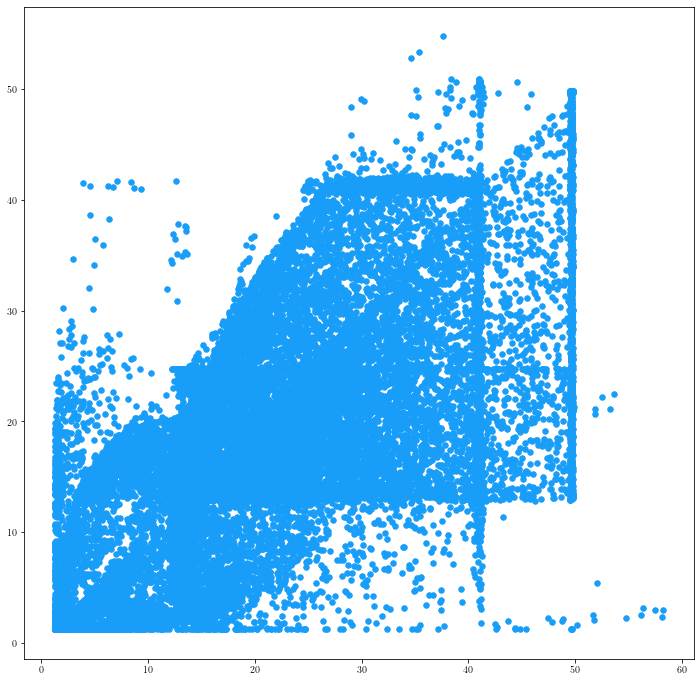

In [16]:
f, ax= plt.subplots(1, 1,  figsize=(12,12))      

# just a list of colors
colorslist =  ['#189ef8' , '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00'] 


# use plt.scatter to plot all datapoints.  
ax.scatter(mass1, mass2, s=30, color=colorslist[0])

plt.show()


### we can improve the figure by adding axes labels, and increasing the label sizes:

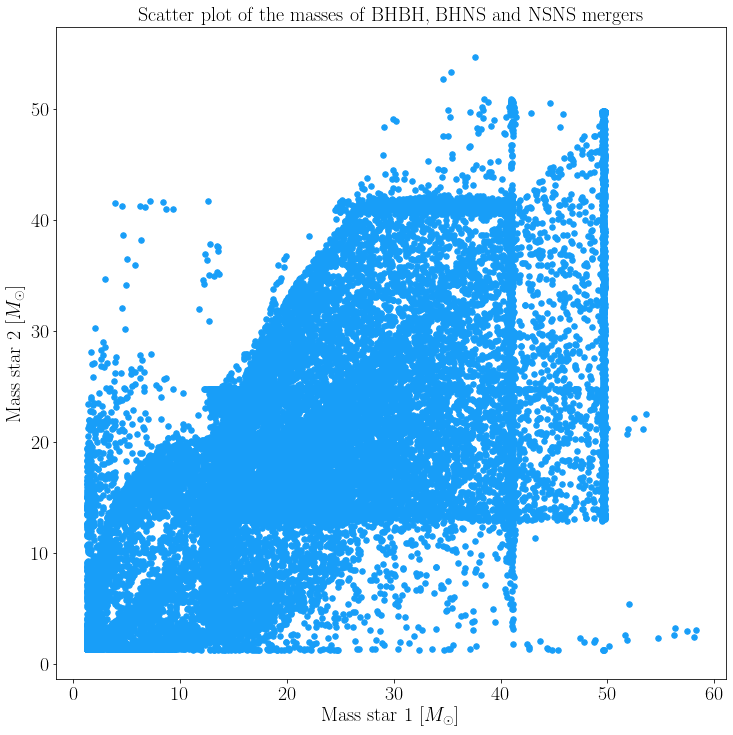

In [23]:
f, ax= plt.subplots(1, 1,  figsize=(12,12))      

# just a list of colors
colorslist =  ['#189ef8' , '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00'] 


# use plt.scatter to plot all datapoints.  
ax.scatter(mass1, mass2, s=30, color=colorslist[0])


# increase tick size
ax.tick_params(labelsize=20)
ax.set_xlabel('Mass star 1 [$M_{\odot}$]', fontsize=20)
ax.set_ylabel('Mass star 2 [$M_{\odot}$]', fontsize=20)

ax.set_title('Scatter plot of the masses of BHBH, BHNS and NSNS mergers', fontsize=20)

plt.show()


## In order to compare with Observations, we might want to seperate the different merger types

 - We will assume that all compact objects with masses between 1 and 2.5 solar masses are a Neutron Star
 - objects with masses above 2.5 solar masses are Black Holes
 
 
 we thus have to find in our data which masses M1, and M2 are below or above 2.5 solar masses. 
 this can be done using a "mask" 

In [25]:
mass1 = data['M1']
print(mass1)

0        41.04000
1        23.72530
2         4.16035
3        24.72080
4        30.62660
           ...   
27069    15.09810
27070    33.09770
27071     1.61800
27072     6.31453
27073    13.29870
Name: M1, Length: 27074, dtype: float64


In [27]:
black_holes_1 = mass1.where(mass1>2.5)
print(black_holes_1)

0        41.04000
1        23.72530
2         4.16035
3        24.72080
4        30.62660
           ...   
27069    15.09810
27070    33.09770
27071         NaN
27072     6.31453
27073    13.29870
Name: M1, Length: 27074, dtype: float64


<div class="alert alert-block alert-info">
do the same as above for the neutron stars! <br>
  

In [28]:
neutron_stars_1 = mass1.where(mass1<=2.5)
print(neutron_stars_1)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
27069      NaN
27070      NaN
27071    1.618
27072      NaN
27073      NaN
Name: M1, Length: 27074, dtype: float64


### However, to select BH-BH mergers, we need to have both systems (M1 & M2) in the binary be a BH. We can make a "combined mask" using the following:

In [31]:
# select systems that have both M1 and M2 masses that qualify for a BH. 
maskBHBH = (data['M1'] > 2.5 ) & (data['M2'] >2.5)

print(maskBHBH)

0         True
1         True
2         True
3         True
4         True
         ...  
27069     True
27070     True
27071    False
27072     True
27073     True
Length: 27074, dtype: bool


### We can now use this mask, to give the BHBH a different color in our figure

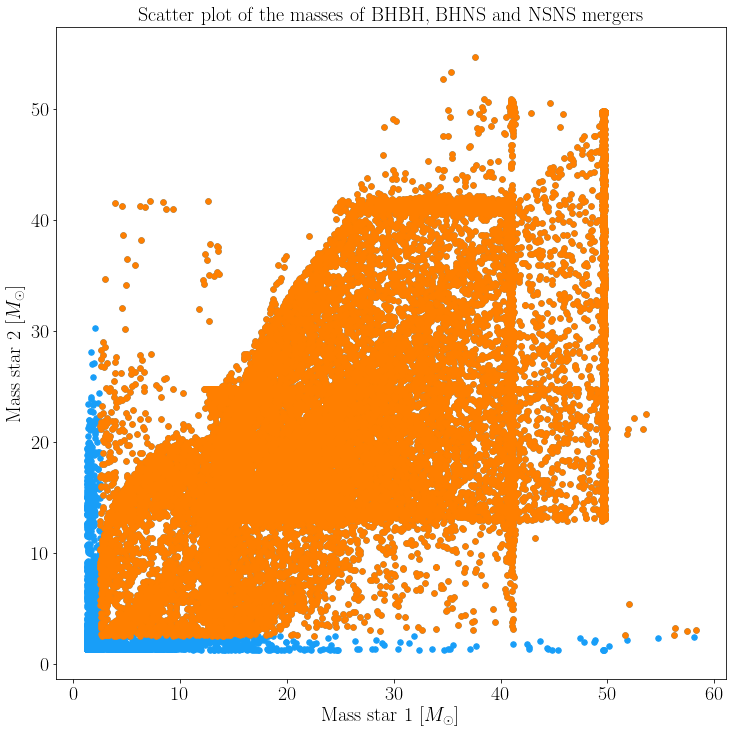

In [39]:
f, ax= plt.subplots(1, 1,  figsize=(12,12))      

# just a list of colors
colorslist =  ['#189ef8' , '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00'] 


# use plt.scatter to plot all datapoints.  
ax.scatter(mass1, mass2, s=30, color=colorslist[0])

# give the black holes a different color from our color list (orange). 
ax.scatter(mass1[maskBHBH], mass2[maskBHBH], s=30, color=colorslist[1])

# increase tick size
ax.tick_params(labelsize=20)
ax.set_xlabel('Mass star 1 [$M_{\odot}$]', fontsize=20)
ax.set_ylabel('Mass star 2 [$M_{\odot}$]', fontsize=20)

ax.set_title('Scatter plot of the masses of BHBH, BHNS and NSNS mergers', fontsize=20)

plt.show()


### and we can add a label to the BHBH mergers using label='BHBH', we also have to add the legend for the labels

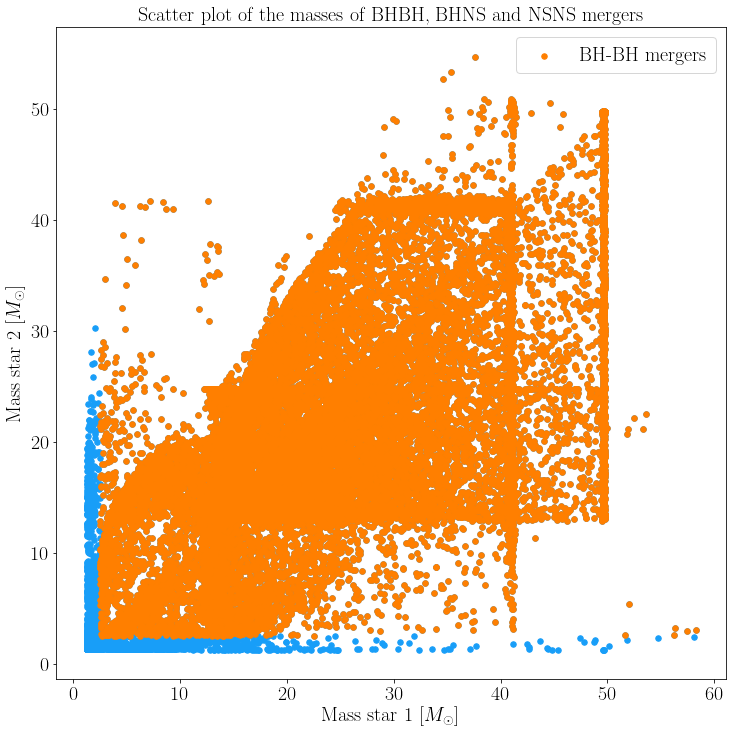

In [35]:
f, ax= plt.subplots(1, 1,  figsize=(12,12))      

# just a list of colors
colorslist =  ['#189ef8' , '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00'] 


# use plt.scatter to plot all datapoints.  
ax.scatter(mass1, mass2, s=30, color=colorslist[0])

# give the black holes a black color
ax.scatter(mass1[maskBHBH], mass2[maskBHBH], s=30, color=colorslist[1], label='BH-BH mergers')

# increase tick size
ax.tick_params(labelsize=20)
ax.set_xlabel('Mass star 1 [$M_{\odot}$]', fontsize=20)
ax.set_ylabel('Mass star 2 [$M_{\odot}$]', fontsize=20)

ax.set_title('Scatter plot of the masses of BHBH, BHNS and NSNS mergers', fontsize=20)


ax.legend(fontsize=20)

plt.show()


<div class="alert alert-block alert-info">
 - Can you do the same for the mergers between 2 Neutron stars?  <br>
 - and for the combination of a neutron star and black hole? <br>

### now our figure is already publishable for a scientific journal. However, we might in our figure want to compare with observations 

Below is a dataset of the black hole and neutron star masses that are observed by the gravitational-wave detectors LIGO & Virgo. <br>
this data is taken from the publicly available detections https://www.gw-openscience.org/catalog/GWTC-1-confident/html/

In [40]:
# array with gravitational wave estimates from LIGO-Virgo public data
#name m1 m1_plus m1_minus m2 m2_plus m2_minus spin spin_plus spin_minus
gw150914 = [35.6, 4.8, 3, 30.6, 3, 4.4, -0.01, 0.12, 0.13]                     
gw151012 = [23.3, 14, 5.5, 13.6, 4.1, 4.8, 0.04, 0.28, 0.19]                     
gw151226 = [13.7, 8.8, 3.2, 7.7, 2.2, 2.6, 0.18, 0.2, 0.12]           
gw170104 = [31, 7.2, 5.6, 20.1, 4.9, 4.5, -0.04, 0.17, 0.2]       
gw170608 = [10.9 ,5.3 ,1.7, 7.6, 1.3, 2.1, 0.03, 0.19, 0.07]       
gw170729 = [50.6, 16.6, 10.2, 34.3, 9.1, 10.1 ,0.36, 0.2, 0]       
gw170809 = [35.2 ,8.3, 6 ,23.8 ,5.2, 5.1, 0.07 ,0.16 ,0.16]    
gw170814 = [30.7 ,5.7, 3, 25.3, 2.9, 4.1, 0.07, 0.12, 0.11]   
gw170817 = [1.46 ,0.12 ,0.1 ,1.27 ,0.09 ,0.09, 0 ,0.02 ,0.01]    
gw170818 = [35.5 ,7.5 ,4.7, 26.8, 4.3 ,5.2, -0.09, 0.18, 0]   
gw170823 = [39.6 ,10 ,6.6 ,29.4, 6.3, 7.1 ,0.08, 0.2, 0.22]


# combine the gravitational wave data:
GWdata = [gw150914, gw151012, gw151226, gw170104,gw170608,gw170729 , gw170809, gw170814, gw170817, gw170818, gw170823]

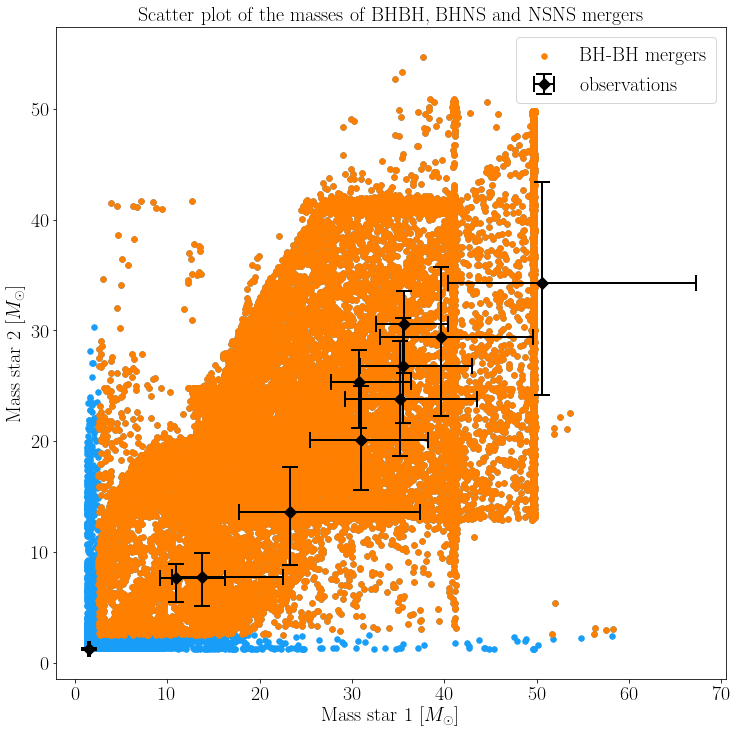

In [44]:
f, ax= plt.subplots(1, 1,  figsize=(12,12))      

# just a list of colors
colorslist =  ['#189ef8' , '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00'] 


# use plt.scatter to plot all datapoints.  
ax.scatter(mass1, mass2, s=30, color=colorslist[0])

# give the black holes a black color
ax.scatter(mass1[maskBHBH], mass2[maskBHBH], s=30, color=colorslist[1], label='BH-BH mergers')

# plot error bars of GW sources:
for gw in GWdata:
    if gw==gw150914:
        ax.errorbar(x = gw[0], y =gw[3], yerr = [[gw[5]],[gw[4]]],\
                    xerr = [[gw[2]], [gw[1]]] , c='k', elinewidth = 2,\
                    capthick=2, zorder = 20, capsize = 8, fmt = 'D',\
                    markersize='8', label='observations')
    else:
        ax.errorbar(x = gw[0], y =gw[3], yerr = [[gw[5]],[gw[4]]],\
                    xerr = [[gw[2]], [gw[1]]] , c='k', elinewidth = 2,\
                    capthick=2, zorder = 20, capsize = 8, fmt = 'D',\
                    markersize='8') 
    


# increase tick size
ax.tick_params(labelsize=20)
ax.set_xlabel('Mass star 1 [$M_{\odot}$]', fontsize=20)
ax.set_ylabel('Mass star 2 [$M_{\odot}$]', fontsize=20)

ax.set_title('Scatter plot of the masses of BHBH, BHNS and NSNS mergers', fontsize=20)


ax.legend(fontsize=20)

plt.show()


### Now you have recreated the figure from for example https://arxiv.org/pdf/1801.05433.pdf  [Fig 15] that has over 100 citations!

other similar figures are also presented in papers such as https://arxiv.org/abs/1809.04605, https://arxiv.org/pdf/2004.05187.pdf, https://arxiv.org/pdf/1905.00910.pdf! 


<div class="alert alert-block alert-info">
 - What other things would you add / change to further improve the figure?

# Furher information:
#### (free resources)

**pandas** <br>
 - https://www.learnpython.org/en/Pandas_Basics
 - https://pandas.pydata.org/
 - https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673
 
**gravitational waves**<br>
 - https://www.ligo.caltech.edu/page/learn-more
 - https://www.ligo.caltech.edu/page/what-are-gw
 - https://spaceplace.nasa.gov/gravitational-waves/en/
 
**matplotlib** <br>
 - https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596
 - https://pythonprogramming.net/matplotlib-python-3-basics-tutorial/
 
 
 **using masks in python** <br>
 - http://danielandreasen.github.io/:about/2015/01/19/masks-in-python/
 - https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html
 
 


In [18]:
def symmetrizedMasses(m1=20, m2=10):
    """returns back symmetrized masses: 
    where m1 is always the most massive of the binary"""
    
    maskM1BH = (m1 >=m2)
    m1moremass, m2leastmass = np.zeros_like(m1), np.zeros_like(m1)
    m1moremass[maskM1BH], m1moremass[~maskM1BH] = m1[maskM1BH], m2[~maskM1BH]

    m2leastmass[maskM1BH],m2leastmass[~maskM1BH] = m2[maskM1BH], m1[~maskM1BH]
    
    return m1moremass, m2leastmass

